In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from ephys import core
from ephys import clust
from ephys import events
from ephys import rasters
import os
import scipy as sp
#import get_STA
loc_dat = '/home/AD/tsheehan/data/grid_data/'
import pickle

In [9]:
loc_dat1 = loc_dat + 'spikes.pickle'
fid1 = open(loc_dat1,'rb')
spks = pickle.load(fid1)
loc_dat2 = loc_dat + 'trials.pickle'
fid2 = open(loc_dat2,'rb')
trials = pickle.load(fid2)

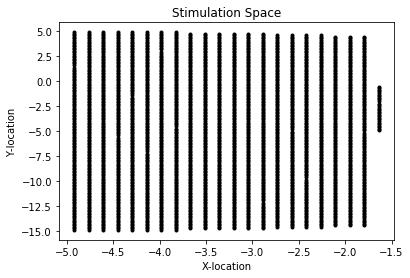

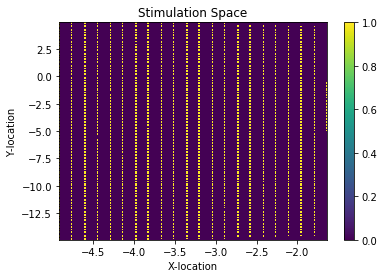

In [418]:
plt.plot(stim_labels[:,0],stim_labels[:,1],'k.')
plt.xlabel('X-location')
plt.ylabel('Y-location')
plt.title('Stimulation Space')
plt.show()

plt.hist2d(stim_labels[:,0],stim_labels[:,1],bins=200)
plt.xlabel('X-location')
plt.ylabel('Y-location')
plt.title('Stimulation Space')
plt.colorbar()
plt.show()
#help(plt.hist2d:)

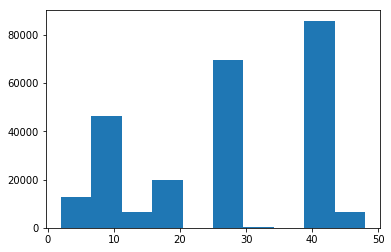

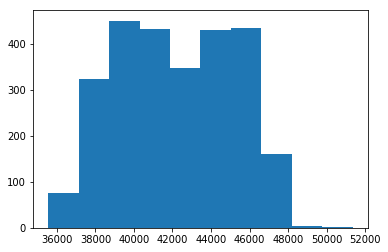

In [339]:
stim_labels = list(trials.stim_points)
stim_labels = np.stack(trials.stim_points)
shift_st= 0*1000
shift_ed= 0*1000
st_time = list(trials.time_samples)
st_time = [i+shift_st for i in st_time]
end_time = list(trials.stimulus_end)
end_time = [i+shift_ed for i in end_time]
time_win = np.stack([st_time,end_time ])

clust = list(set(spks.cluster))
plt.hist(spks.cluster)
plt.show()
plt.hist(time_win[1,:]-time_win[0,:])
plt.show()

In [299]:
unit_use = clust[2]
my_spks = spks[spks.cluster==unit_use].time_samples
print ('Time Window Dim:', np.shape(time_win))
print('N Spikes Total:', len(my_spks))

Time Window Dim: (2, 2660)
N Spikes Total: 12216


In [300]:
def cnt_in_win(my_spks,win):
    n_trials = np.shape(win)[1]
    n_per_win = np.zeros(n_trials)
    for i in range(n_trials):
        this_win = win[:,i]
        n_this_win = np.sum((my_spks>this_win[0]) & (my_spks<this_win[1]))
        n_per_win[i] = n_this_win
        
    return n_per_win
spk_ev = cnt_in_win(my_spks,time_win)

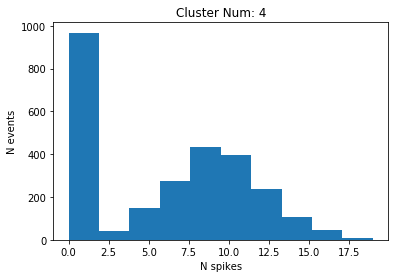

In [301]:
plt.hist(spk_ev)
plt.xlabel('N spikes')
plt.ylabel('N events')
plt.title('Cluster Num: ' + str(unit_use))
plt.show()

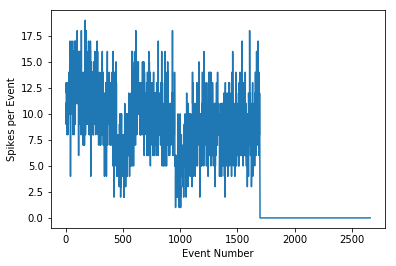

In [302]:
plt.plot(spk_ev)
plt.xlabel('Event Number')
plt.ylabel('Spikes per Event')
plt.show()

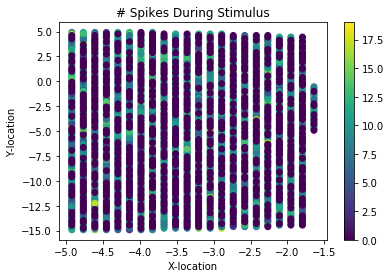

In [303]:
plt.scatter(stim_labels[:,0],stim_labels[:,1],c=spk_ev)
plt.xlabel('X-location')
plt.ylabel('Y-location')
plt.title('# Spikes During Stimulus')
plt.colorbar()
plt.show()

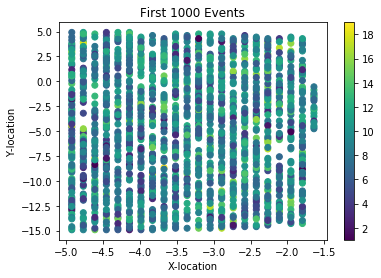

In [304]:
pt_view = np.arange(0,1500)
plt.scatter(stim_labels[pt_view,0],stim_labels[pt_view,1],c=spk_ev[pt_view])
plt.colorbar()
plt.title('First 1000 Events')
plt.xlabel('X-location')
plt.ylabel('Y-location')
plt.show()

# Attempt Scattered Interpolation

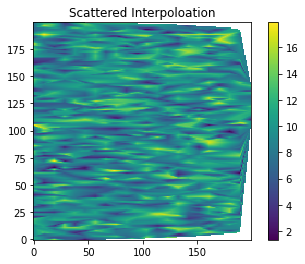

In [305]:
from matplotlib.mlab import griddata
numIndexes = 200
xi = np.linspace(np.min(stim_labels[pt_view,0]), np.max(stim_labels[pt_view,0]),numIndexes)
yi = np.linspace(np.min(stim_labels[pt_view,1]), np.max(stim_labels[pt_view,1]),numIndexes)
DEM = griddata(stim_labels[pt_view,0], stim_labels[pt_view,1], spk_ev[pt_view], xi, yi,interp='linear')
plt.imshow(DEM,origin='lower')#,cmap ='RdYlGn_r'
plt.title('Scattered Interpoloation')
plt.colorbar()
plt.show()

In [398]:
def summarize_unit(spks,clust_use,trials,ev_use,ev_bump=[0,0],numIndexes = 200):
    clust = list(set(spks.cluster))
    unit_use = clust[clust_use]
    my_spks = spks[spks.cluster==unit_use].time_samples

    stim_labels = list(trials.stim_points)
    stim_labels = np.stack(trials.stim_points)
    shift_st= ev_bump[0]*1000
    shift_ed= ev_bump[1]*1000
    st_time = list(trials.time_samples)
    st_time = [i+shift_st for i in st_time]
    end_time = list(trials.stimulus_end)
    end_time = [i+shift_ed for i in end_time]
    time_win = np.stack([st_time,end_time ])
    spk_ev = cnt_in_win(my_spks,time_win)
    #pt_view = ev_use
    
    plt.figure(figsize=(8,8))
    plt.subplot(2,2,1)
    plt.hist(spk_ev[ev_use])
    plt.xlabel('N spikes')
    plt.ylabel('N events')
    plt.title('Cluster Num: ' + str(unit_use))

    plt.subplot(2,2,2)
    plt.plot(spk_ev[ev_use])
    plt.xlabel('Event Number')
    plt.ylabel('Spikes per Event')
    
    plt.subplot(2,2,3)

    plt.scatter(stim_labels[ev_use,0],stim_labels[ev_use,1],c=spk_ev[ev_use],alpha=0.4,marker='s',cmap ='YlOrRd',s=50)
    plt.colorbar()
    plt.title('First '+ str(ev_use[-1]+1)+' Events')
    plt.xlabel('X-location')
    plt.ylabel('Y-location')

    plt.subplot(2,2,4)

    xi = np.linspace(np.min(stim_labels[ev_use,0]), np.max(stim_labels[ev_use,0]),numIndexes)
    yi = np.linspace(np.min(stim_labels[ev_use,1]), np.max(stim_labels[ev_use,1]),numIndexes)
    DEM = griddata(stim_labels[ev_use,0], stim_labels[ev_use,1], spk_ev[ev_use], xi, yi,interp='linear')
    plt.imshow(DEM,origin='lower')#,cmap ='RdYlGn_r'
    plt.title('Scattered Interpoloation')
    plt.colorbar()

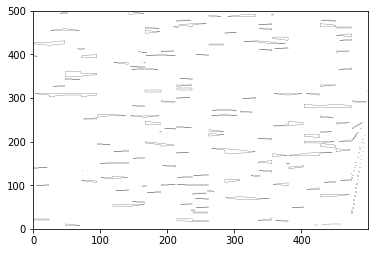

In [194]:
levels = np.arange(np.min(DEM),np.max(DEM),25)
plt.contour(DEM, levels,linewidths=0.2,colors='k')

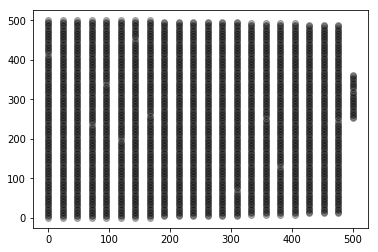

In [187]:
xArrayNormalized=stim_labels[:,0]/(np.max(stim_labels[:,0])-np.min(stim_labels[:,0]))
xArrayNormalized-=np.min(xArrayNormalized)
yArrayNormalized=stim_labels[:,1]/(np.max(stim_labels[:,1])-np.min(stim_labels[:,1]))
yArrayNormalized-=np.min(yArrayNormalized)
plt.scatter(numIndexes*xArrayNormalized,numIndexes*yArrayNormalized,color='k',alpha=0.29)

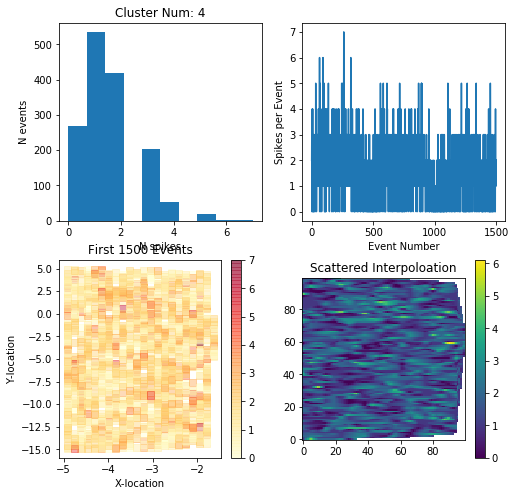

In [400]:
summarize_unit(spks,2,trials,np.arange(1500),ev_bump=[5,-30],numIndexes = 100)

In [611]:
# check time distribution of events
#trials
# GET PSTH for a given set of windows
def spks_in_win(spks,st_time,win_len):
    #st_time[st_time>len(spks)] = []
    st_time = np.delete(st_time,np.where(st_time>len(spks)))
    n_trials = len(st_time)
    PSTH = np.zeros((win_len,n_trials))
    for i in range(n_trials):
        this_win = np.arange(st_time[i],st_time[i]+win_len)
        PSTH[:,i] = spks[this_win]
    return PSTH

In [762]:
unit_use = clust[6] #3
spk_times = np.array(spks[spks.cluster==unit_use].time_samples)
my_spikes = np.zeros(np.max(spk_times)+1,dtype=int)
my_spikes[spk_times] = int(1)
st_time = np.array(trials.time_samples)

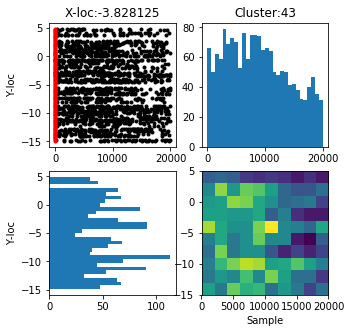

In [765]:
x_pts = stim_labels[:,0]
y_pts = stim_labels[:,1]
x_val = np.unique(x_pts)
y_val = np.unique(y_pts)

x_use = x_pts[6] # 6
pts_want = x_pts==x_use
PSTH = spks_in_win(my_spikes,st_time[pts_want],20*1000)

spk_loc = np.where(PSTH>=1)
val_pts_want = np.where(np.array(pts_want))


probe_y = y_pts[pts_want]
spk_loc_y = probe_y[spk_loc[1]]

plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
plt.title('X-loc:' + str(x_use))
plt.plot(spk_loc[0],spk_loc_y,'k.')
plt.plot(np.zeros(sum(pts_want)),probe_y,'r.')
plt.ylabel('Y-loc')

plt.subplot(2,2,2)
plt.hist(spk_loc[0],30)
plt.title('Cluster:'+ str(unit_use))

plt.subplot(2,2,3)
plt.hist(spk_loc_y,30,orientation="horizontal")
plt.ylabel('Y-loc')

plt.subplot(2,2,4)
plt.hist2d(spk_loc[0],spk_loc_y)
plt.xlabel('Sample')
plt.show()